# Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,auc,roc_curve,confusion_matrix
from sklearn.linear_model import LinearRegression

# Data

In [2]:
train = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/train_fe_v0.csv')
test = pd.read_csv('/home/giampa95/programming/DS/housing_price_kaggle/data/test_fe_v0.csv')

In [3]:
# Converto to numpy
x_columns = train.columns.drop(['SalePrice','Unnamed: 0'])
x = train[x_columns].values
y = train['SalePrice'].values
x_columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# How accuracy varies with split random_state


In [4]:
R2s = list()
MAEs = list()
for i in range(10):
    # Create train/test
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.2, random_state=i)
    # start model
    model = LinearRegression()
    # fit model
    model.fit(x_train,y_train)
    # predictions
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

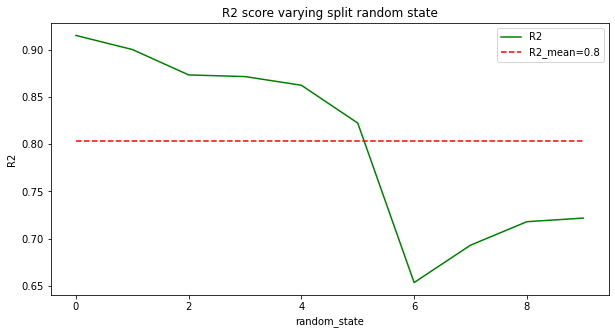

In [12]:
x1 = np.array(range(len(R2s)))
R2_mean = np.repeat(np.mean(R2s),len(R2s))

plt.figure(figsize=(10,5));

plt.plot(x1,R2s,'g',
        x1,R2_mean,'r--');

plt.xlabel("random_state");
plt.ylabel("R2");
plt.legend(['R2',f'R2_mean={round(np.mean(R2s),2)}']);
plt.title("R2 score varying split random state");
plt.savefig('R2=f(random_state).png');

# How accuracy varies with test size %

In [6]:
R2s = list()
MAEs = list()
for i in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]:
    # Create train/test
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=i, random_state=42)
    # start model
    model = LinearRegression()
    # fit model
    model.fit(x_train,y_train)
    # predictions
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2s.append(R2)
    MAEs.append(MAE)
    

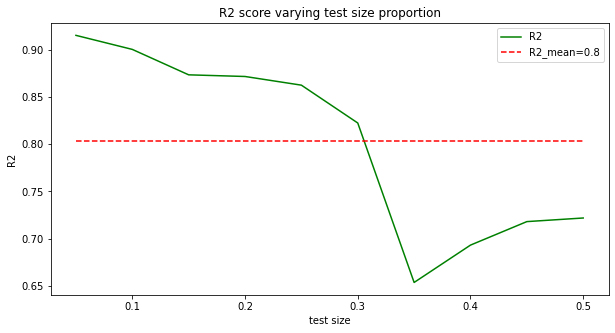

In [7]:
x1 = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
R2_mean = np.repeat(np.mean(R2s),len(R2s))

plt.figure(figsize=(10,5));

plt.plot(x1,R2s,'g',
        x1,R2_mean,'r--');

plt.xlabel("test size");
plt.ylabel("R2");
plt.legend(['R2',f'R2_mean={round(np.mean(R2s),2)}']);
plt.title("R2 score varying test size proportion");

# Learning curves

In [8]:
J_trains = list()
J_tests = list()
x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.4, random_state=5)
for i in range(400,1410,10):
    # start model 
    model = LinearRegression()
    # fit model
    model.fit(x_train[0:i,:],y_train[0:i])
    # predictions
    y_pred_train = model.predict(x_train[0:i,:])
    y_pred_test = model.predict(x_test[0:i,:])
    J_train = mean_squared_error(y_train[0:i],y_pred_train[0:i])
    J_test = mean_squared_error(y_test[0:i],y_pred_test[0:i])
    J_trains.append(J_train)
    J_tests.append(J_test)

In [9]:
(J_tests[-1]-J_trains[-1])/10000000

12.695020081912064

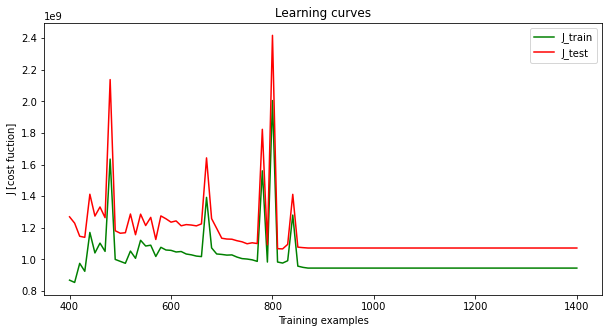

In [10]:
x1 = np.array(range(400,1410,10))

plt.figure(figsize=(10,5));

plt.plot(x1,J_trains,'g',
        x1,J_tests,'r');

plt.xlabel("Training examples");
plt.ylabel("J [cost fuction]");
plt.legend(['J_train','J_test']);
plt.title("Learning curves");